CodeClause Internship Project - Self Driving Car

Intern ID - CC51516

Intern Name - Sahib Preet Singh

Designation - Artificial Intelligence Intern

Project Description:
This project is based on the concept of Self Driving Car. The main objective of this project is to train a model which can drive a car on its own. The model is trained on the basis of the data collected from the car. The data is collected using the Udacity Simulator. The model is trained using the Convolutional Neural Network. The model is trained on the basis of the images collected from the car. The model is trained to predict the steering angle of the car. The model is tested on Udacity Open Source simulator.


In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

Training dataset and focusing on 2 features for driving in this project


In [126]:
train_df = pd.read_csv("data_cars.csv",
                       names=["center_camera", "left_cam", "right_cam", "steering", "throttle", "reverse", "speed"])
train_df = train_df[["center_camera", "steering"]]
train_df.head()

,center_camera,steering
0,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
1,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
2,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
3,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
4,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   center_cam      3930 non-null   object 
 1   steering_angle  3930 non-null   float64
dtypes: float64(1), object(1)
memory usage: 61.5+ KB


Extracting proper path for the image

In [56]:
train_df["center_camera"][0].split("\\")[-1]

'center_2022_04_10_12_24_41_840.jpg'

In [57]:
train_df["center_camera"] = train_df["center_camera"].apply(lambda x: x.split("\\")[-1])
train_df.head()

,center_camera,steering
0,center_2022_04_10_12_24_41_840.jpg,0.0
1,center_2022_04_10_12_24_41_908.jpg,0.0
2,center_2022_04_10_12_24_41_976.jpg,0.0
3,center_2022_04_10_12_24_42_044.jpg,0.0
4,center_2022_04_10_12_24_42_116.jpg,0.0


Creating a graph of steering angles

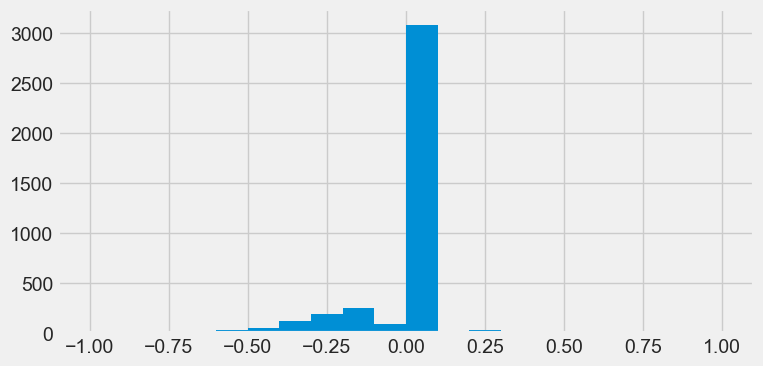

In [84]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 4))
plt.hist(train_df.steering.values, bins=20);

In [78]:
train_df.steering.describe()

count    3930.000000
mean       -0.034529
std         0.133405
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

In [87]:
df_steeringnotzero = train_df.loc[train_df["steering"] != 0.0]
df_steeringnotzero.head()

,center_camera,steering
6,center_2022_04_10_12_24_42_256.jpg,-0.05
7,center_2022_04_10_12_24_42_324.jpg,-0.20
8,center_2022_04_10_12_24_42_393.jpg,-0.35
9,center_2022_04_10_12_24_42_463.jpg,-0.55
10,center_2022_04_10_12_24_42_531.jpg,-0.70


In [89]:
img_names = train_df[train_df["steering"] < 0].center_camera.values
img_names[10:20]

array(['center_2022_04_10_12_24_42_947.jpg',
       'center_2022_04_10_12_24_43_581.jpg',
       'center_2022_04_10_12_24_43_934.jpg',
       'center_2022_04_10_12_24_44_003.jpg',
       'center_2022_04_10_12_24_44_216.jpg',
       'center_2022_04_10_12_24_44_287.jpg',
       'center_2022_04_10_12_24_44_569.jpg',
       'center_2022_04_10_12_24_44_640.jpg',
       'center_2022_04_10_12_24_44_711.jpg',
       'center_2022_04_10_12_24_44_923.jpg'], dtype=object)

plotting images of different steering angles


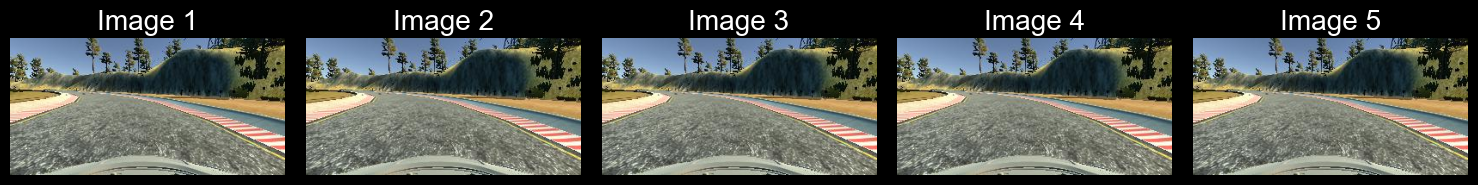

In [108]:
plt.style.use("dark_background")
img_dir = "dataset\IMG"
img_names = os.listdir(img_dir)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    img_path = os.path.join(img_dir, img_names[i])
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Checking one image in flipped view

(-0.5, 319.5, 159.5, -0.5)

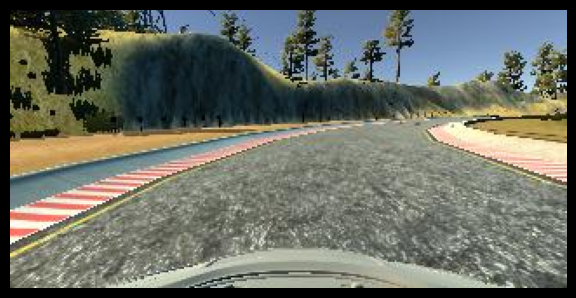

In [111]:
plt.imshow(cv2.flip(img, 1))
plt.axis('off')

Applying data augmentation to artificially increase size of training dataset by applying various transformations

1. Random Rotation

2. Flipped Image

0.5


(-0.5, 319.5, 159.5, -0.5)

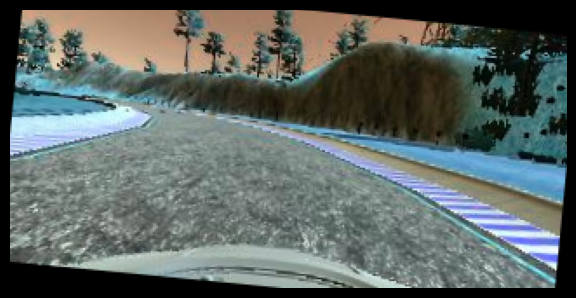

In [120]:
def random_rotation(img_path, label, max_angle=20):
    img = cv2.imread(img_path)
    angle = np.random.uniform(-max_angle, max_angle)
    rows, cols, _ = img.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img, label


img_path = os.path.join(img_dir, img_names[1])
label = 0.5 

rotated, rotated_label = random_rotation(img_path, label)
plt.imshow(rotated)
print(rotated_label)
plt.axis('off')
    

0.5


(-0.5, 319.5, 159.5, -0.5)

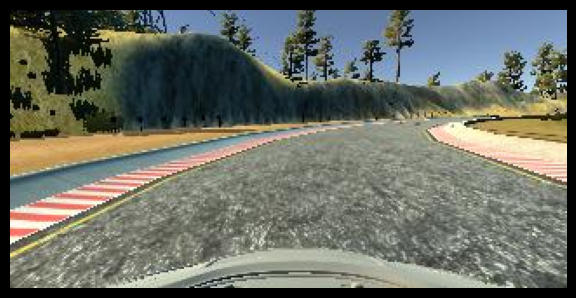

In [123]:
def flipped_data(img_dir, img_name, label):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    return (cv2.flip(img, 1), (-label))

flipped_img, new_label = flipped_data(img_dir, img_names[0], -0.5)
plt.imshow(flipped_img);
print(new_label)
plt.axis("off")

Saving new images considering flipped data augmentation for training purpose as it covers left hand side driving too

In [124]:
def augment_and_save(img_dir, img_name, label):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    new_img_name = img_name.replace(".jpg", "") + "_flipped.jpg"
    new_img_path = os.path.join(img_dir, new_img_name)
    cv2.imwrite(new_img_path, cv2.flip(img, 1))
    return (new_img_name, (-label))

In [127]:
images = []
labels = []

img_dir = "dataset\IMG"

for index, data in df_steeringnotzero.iterrows():
    image, label = augment_and_save(img_dir, data["center_camera"],  data["steering"])
    images.append(image)
    labels.append(label)

0.05


(-0.5, 319.5, 159.5, -0.5)

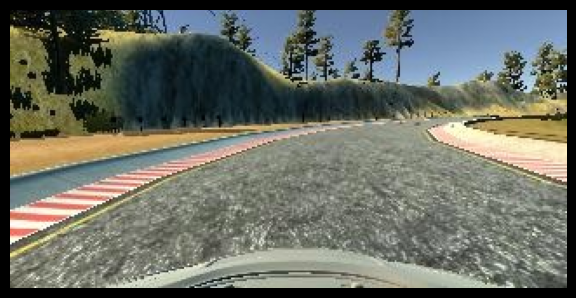

In [129]:
img_path = os.path.join(img_dir, images[0])
img = plt.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
print(labels[0])
plt.axis("off")

In [132]:
augmented_df = pd.DataFrame(list(zip(images, labels)), columns=["center_camera", "steering"])

In [134]:
df_steeringzero = train_df.query("steering == 0.0").sample(frac=.05)
len(zero_df)

153

In [135]:
new_train_df = pd.concat([df_steeringzero, augmented_df, df_steeringnotzero])
new_train_df.head()

,center_camera,steering
2558,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
729,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
2140,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
2576,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0
1574,C:\Users\Andy\Desktop\self_driving_car_dataset...,0.0


In [136]:
len(new_train_df)

1891

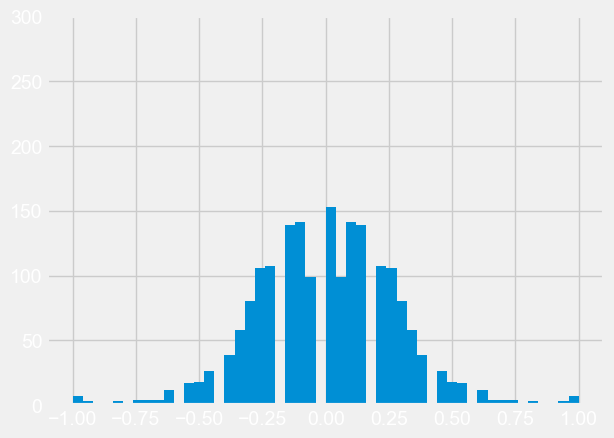

In [140]:
plt.style.use("fivethirtyeight")
plt.ylim(0, 300)
plt.hist(new_train_df.steering.values, bins=50);


In [142]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(validation_split=0.2)

In [145]:
train_generator = generator.flow_from_dataframe(
  dataframe = new_train_df,
  directory = "dataset/IMG",
  x_col = "center_camera",
  y_col = "steering",
  subset = "training",
  batch_size = 32,
  seed = 42,
  shuffle = True,
  class_mode = "raw",
  target_size = (160, 320),
)
train_generator = generator.flow_from_dataframe(
  dataframe = new_train_df,
  directory = "dataset/IMG",
  x_col = "center_camera",
  y_col = "steering",
  subset = "validation",
  batch_size = 32,
  seed = 42,
  shuffle = True,
  class_mode = "raw",
  target_size = (160, 320),
)

Found 1391 validated image filenames.
Found 347 validated image filenames.


Applying Model

In [146]:
data_augmentation = keras.Sequential([layers.RandomContrast(0.5),])

In [148]:
model = tf.keras.Sequential([
    layers.Input(shape=(160, 320, 3)),
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [157]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"],
)

history = model.fit(
    train_generator,
    epochs=20,  
    validation_data=valid_generator,
)

Epoch 1/20
11/11 [==============================] - 99s 9s/step - loss: 0.0566 - mae: 0.1761 - val_loss: 0.0383 - val_mae: 0.1428
Epoch 2/20
11/11 [==============================] - 94s 9s/step - loss: 0.0526 - mae: 0.1640 - val_loss: 0.0406 - val_mae: 0.1302
Epoch 3/20
11/11 [==============================] - 94s 9s/step - loss: 0.0479 - mae: 0.1576 - val_loss: 0.0436 - val_mae: 0.1302
Epoch 4/20
11/11 [==============================] - 88s 8s/step - loss: 0.0452 - mae: 0.1525 - val_loss: 0.0507 - val_mae: 0.1355
Epoch 5/20
11/11 [==============================] - 87s 8s/step - loss: 0.0443 - mae: 0.1550 - val_loss: 0.0524 - val_mae: 0.1365
Epoch 6/20
11/11 [==============================] - 83s 8s/step - loss: 0.0454 - mae: 0.1557 - val_loss: 0.0527 - val_mae: 0.1367
Epoch 7/20
11/11 [==============================] - 82s 8s/step - loss: 0.0481 - mae: 0.1627 - val_loss: 0.0527 - val_mae: 0.1367
Epoch 8/20
11/11 [==============================] - 81s 8s/step - loss: 0.0443 - mae: 0.15

In [158]:
img.shape

(160, 320, 3)

In [159]:
np.squeeze(model.predict(tf.expand_dims(img, axis=0)))

array(0.00159079, dtype=float32)

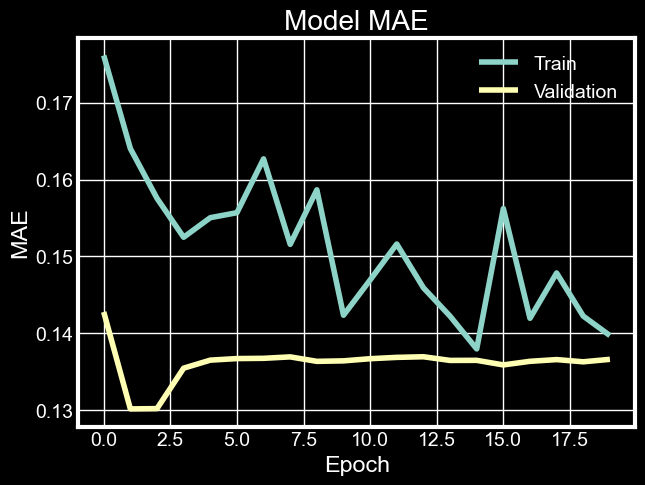

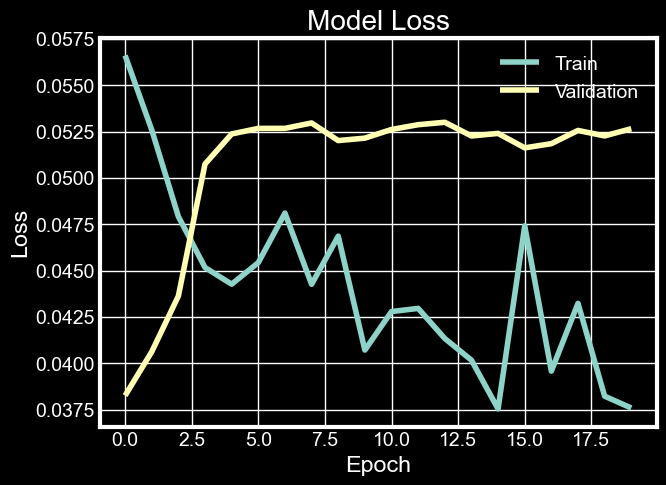

In [168]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [170]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
